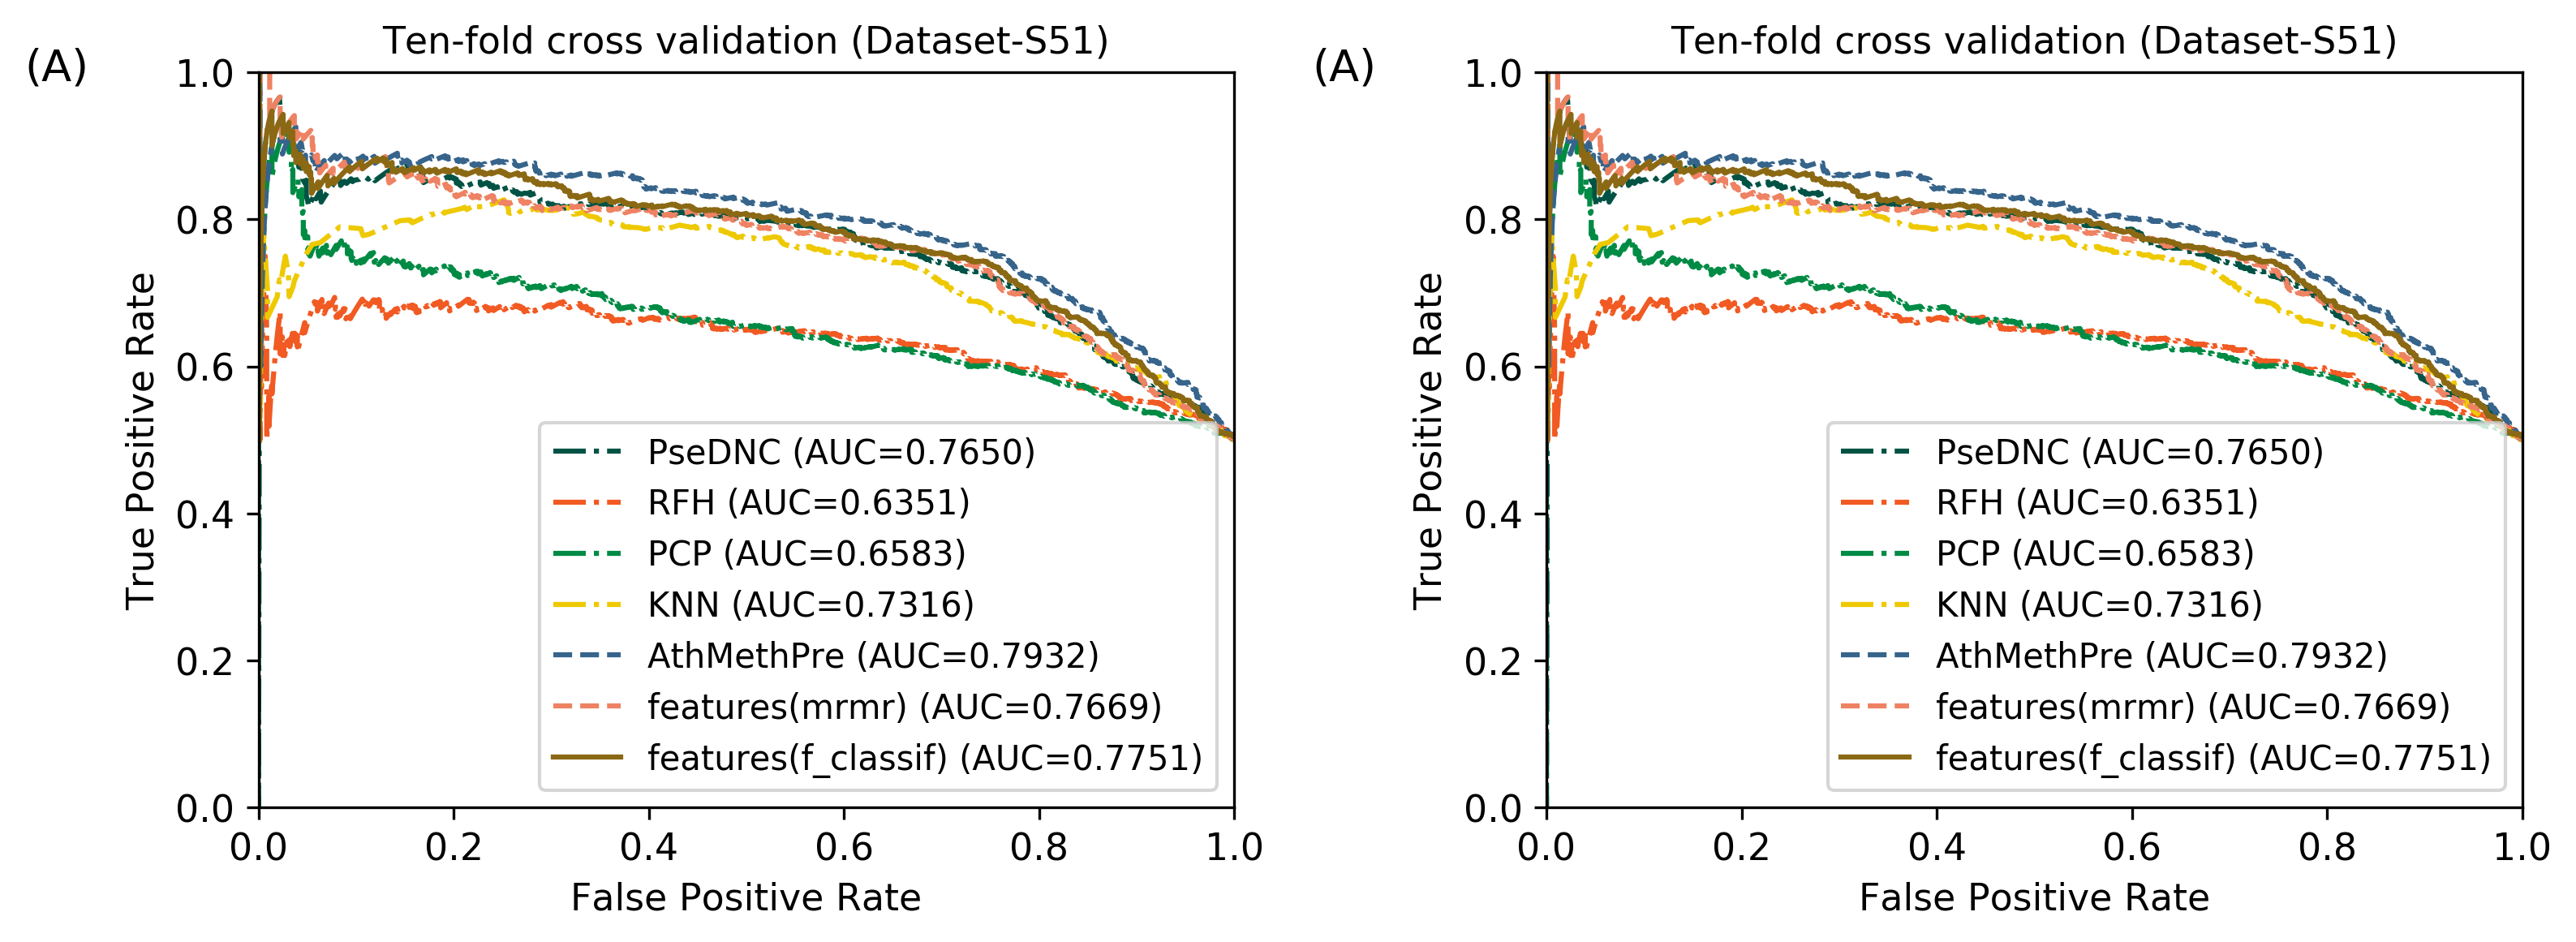

In [11]:
#!/usr/bin/env python
# encoding:utf-8
# print(__doc__)



import numpy as np
import pandas as pd
from scipy import interp
import matplotlib.pyplot as plt
import pylab

import matplotlib
from itertools import cycle
from sklearn import svm
from sklearn.metrics import roc_curve, auc,precision_recall_curve,average_precision_score

plt.figure(figsize=(12,4), dpi=300,facecolor=(1, 1, 1))#设置画布长宽，论文发表的dpi最小为300
# plt.tight_layout()#调整整体空白
plt.subplots_adjust(wspace =0.32, hspace =0.28)#调整子图间距
# plt.subplots()
# plt.tight_layout(h_pad=1.08)
plt.subplot(121)
data=pd.read_csv(u"iRNA-Methyl/saccgaromyces_cerevisiae_dataset_RFH_XGBoost_predict.csv",header=None,index_col=None)# 加载的数据位csv格式，第一列是真实的标签值，第二列是预测值，第三列是预测分数
fpr, tpr, thresholds = precision_recall_curve(data.values[:,0], data.values[:, 2])# 提取真实标签值和预测分数代进precision_recall_curve做参数
average_precision = average_precision_score(data.values[:,0], data.values[:, 2])#得到平均的precision值
plt.plot(tpr,fpr,'r-.',color = '#005344',label=r'PseDNC (AUC=%.4f)'%average_precision)#绘制曲线，设置颜色为#005344，还有要显示在legend里面的内容
data=pd.read_csv(u"iRNA-Methyl/saccgaromyces_cerevisiae_dataset_PseDNC_XGBoost_predict.csv",header=None,index_col=None)
fpr, tpr, thresholds = precision_recall_curve(data.values[:,0], data.values[:, 2])
average_precision = average_precision_score(data.values[:,0], data.values[:, 2])
plt.plot(tpr,fpr,'r-.',color = '#f15a22',label=r'RFH (AUC=%.4f)'%average_precision)
data=pd.read_csv(u"iRNA-Methyl/saccgaromyces_cerevisiae_dataset_PCP_XGBoost_predict.csv",header=None,index_col=None)
fpr, tpr, thresholds = precision_recall_curve(data.values[:,0], data.values[:, 2])
average_precision = average_precision_score(data.values[:,0], data.values[:, 2])
plt.plot(tpr,fpr,'r-.',color = '#008B45',label=r'PCP (AUC=%.4f)'%average_precision)
data=pd.read_csv(u"iRNA-Methyl/saccgaromyces_cerevisiae_dataset_KNN_XGBoost_predict.csv",header=None,index_col=None)
fpr, tpr, thresholds = precision_recall_curve(data.values[:,0], data.values[:, 2])
average_precision = average_precision_score(data.values[:,0], data.values[:, 2])
plt.plot(tpr,fpr,'b-.',color = '#EEC900',label=r'KNN (AUC=%.4f)'%average_precision)
data=pd.read_csv(u"iRNA-Methyl/saccgaromyces_cerevisiae_dataset_AthMethPre_XGBoost_predict.csv",header=None,index_col=None)
fpr, tpr, thresholds = precision_recall_curve(data.values[:,0], data.values[:, 2])
average_precision = average_precision_score(data.values[:,0], data.values[:, 2])
plt.plot(tpr,fpr,'y--',color = '#36648B',label=r"AthMethPre (AUC=%.4f)"%average_precision)
data=pd.read_csv(u"iRNA-Methyl/saccgaromyces_cerevisiae_dataset_2RFH_XGBoost_mrmr_predict.csv",header=None,index_col=None)
fpr, tpr, thresholds = precision_recall_curve(data.values[:,0], data.values[:, 2])
average_precision = average_precision_score(data.values[:,0], data.values[:, 2])
plt.plot(tpr,fpr,'g--',color = '#EE8262',label=r'features(mrmr) (AUC=%.4f)'%average_precision)
data=pd.read_csv(u"iRNA-Methyl/saccgaromyces_cerevisiae_dataset_2RFH_XGBoost_f-score_predict.csv",header=None,index_col=None)
fpr, tpr, thresholds = precision_recall_curve(data.values[:,0], data.values[:, 2])
average_precision = average_precision_score(data.values[:,0], data.values[:, 2])
plt.plot(tpr,fpr,'r-',color = '#8B6914',label=r'features(f_classif) (AUC=%.4f)'%average_precision)

plt.xlim([0, 1])#设置x轴长度
plt.ylim([0, 1])#设置y轴长度
plt.xticks(fontsize=11)#设置x轴字体大小
plt.yticks(fontsize=11)#设置y轴字体大小
plt.xlabel('False Positive Rate',fontsize=11)#设置x轴标签
plt.ylabel('True Positive Rate',fontsize=11)#设置y轴标签
# plt.text(0.4,0.6,'Ten-fold cross validation',fontsize=6)
plt.title('Ten-fold cross validation (Dataset-S51)',fontsize=11)#设置title
# plt.text(0.4,0.53,'evaluated by RF',fontsize='x-large')
plt.text(-0.24,0.99,'(A)',fontsize=13)#途中画质，前两个数值代表位置，fontsize为字体大小
plt.legend(loc="lower right",fontsize=10)#设置legend在右下，字体为10

plt.subplot(122)
data=pd.read_csv(u"iRNA-Methyl/saccgaromyces_cerevisiae_dataset_RFH_XGBoost_predict.csv",header=None,index_col=None)# 加载的数据位csv格式，第一列是真实的标签值，第二列是预测值，第三列是预测分数
fpr, tpr, thresholds = precision_recall_curve(data.values[:,0], data.values[:, 2])# 提取真实标签值和预测分数代进roc_curve做参数
average_precision = average_precision_score(data.values[:,0], data.values[:, 2])#得到roc值
plt.plot(tpr,fpr,'r-.',color = '#005344',label=r'PseDNC (AUC=%.4f)'%average_precision)#绘制曲线，设置颜色为#005344，还有要显示在legend里面的内容
data=pd.read_csv(u"iRNA-Methyl/saccgaromyces_cerevisiae_dataset_PseDNC_XGBoost_predict.csv",header=None,index_col=None)
fpr, tpr, thresholds = precision_recall_curve(data.values[:,0], data.values[:, 2])
average_precision = average_precision_score(data.values[:,0], data.values[:, 2])
plt.plot(tpr,fpr,'r-.',color = '#f15a22',label=r'RFH (AUC=%.4f)'%average_precision)
data=pd.read_csv(u"iRNA-Methyl/saccgaromyces_cerevisiae_dataset_PCP_XGBoost_predict.csv",header=None,index_col=None)
fpr, tpr, thresholds = precision_recall_curve(data.values[:,0], data.values[:, 2])
average_precision = average_precision_score(data.values[:,0], data.values[:, 2])
plt.plot(tpr,fpr,'r-.',color = '#008B45',label=r'PCP (AUC=%.4f)'%average_precision)
data=pd.read_csv(u"iRNA-Methyl/saccgaromyces_cerevisiae_dataset_KNN_XGBoost_predict.csv",header=None,index_col=None)
fpr, tpr, thresholds = precision_recall_curve(data.values[:,0], data.values[:, 2])
average_precision = average_precision_score(data.values[:,0], data.values[:, 2])
plt.plot(tpr,fpr,'b-.',color = '#EEC900',label=r'KNN (AUC=%.4f)'%average_precision)
data=pd.read_csv(u"iRNA-Methyl/saccgaromyces_cerevisiae_dataset_AthMethPre_XGBoost_predict.csv",header=None,index_col=None)
fpr, tpr, thresholds = precision_recall_curve(data.values[:,0], data.values[:, 2])
average_precision = average_precision_score(data.values[:,0], data.values[:, 2])
plt.plot(tpr,fpr,'y--',color = '#36648B',label=r"AthMethPre (AUC=%.4f)"%average_precision)
data=pd.read_csv(u"iRNA-Methyl/saccgaromyces_cerevisiae_dataset_2RFH_XGBoost_mrmr_predict.csv",header=None,index_col=None)
fpr, tpr, thresholds = precision_recall_curve(data.values[:,0], data.values[:, 2])
average_precision = average_precision_score(data.values[:,0], data.values[:, 2])
plt.plot(tpr,fpr,'g--',color = '#EE8262',label=r'features(mrmr) (AUC=%.4f)'%average_precision)
data=pd.read_csv(u"iRNA-Methyl/saccgaromyces_cerevisiae_dataset_2RFH_XGBoost_f-score_predict.csv",header=None,index_col=None)
fpr, tpr, thresholds = precision_recall_curve(data.values[:,0], data.values[:, 2])
average_precision = average_precision_score(data.values[:,0], data.values[:, 2])
plt.plot( tpr,fpr,'r-',color = '#8B6914',label=r'features(f_classif) (AUC=%.4f)'%average_precision)

plt.xlim([0, 1])#设置x轴长度
plt.ylim([0, 1])#设置y轴长度
plt.xticks(fontsize=11)#设置x轴字体大小
plt.yticks(fontsize=11)#设置y轴字体大小
plt.xlabel('False Positive Rate',fontsize=11)#设置x轴标签
plt.ylabel('True Positive Rate',fontsize=11)#设置y轴标签
# plt.text(0.4,0.6,'Ten-fold cross validation',fontsize=6)
plt.title('Ten-fold cross validation (Dataset-S51)',fontsize=11)#设置title
# plt.text(0.4,0.53,'evaluated by RF',fontsize='x-large')
plt.text(-0.24,0.99,'(A)',fontsize=13)#途中画质，前两个数值代表位置，fontsize为字体大小
plt.legend(loc="lower right",fontsize=10)#设置legend在右下，字体为10


# plt.savefig('comparison_of_feature_representation.svg',bbox_inches='tight')#不能跟plt.show同时用，可用来保存svg,pdf,tiff等格式
# print("done")
plt.show()